## DATASET

In [1]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('train_ekmann.csv')
x_train = train['Text']
y_train = train['Emotion']

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24685 entries, 0 to 24684
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     24685 non-null  object
 1   Emotion  24684 non-null  object
 2   Id       24684 non-null  object
dtypes: object(3)
memory usage: 578.7+ KB


In [5]:
train.iloc[:10]

,Text,Emotion,Id
0,My favourite food is anything I didn't have to...,neutral,eebbqej
1,"Now if he does off himself, everyone will thin...",neutral,ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,anger,eezlygj
3,To make her feel threatened,fear,ed7ypvh
4,Dirty Southern Wankers,anger,ed0bdzj
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,surprise,edvnz26
6,Yes I heard abt the f bombs! That has to be wh...,joy,ee3b6wu
7,We need more boards and to create a bit more s...,joy,ef4qmod
8,Damn youtube and outrage drama is super lucrat...,joy,ed8wbdn
9,It might be linked to the trust factor of your...,neutral,eczgv1o


In [6]:
val = pd.read_csv('val_ekmann.csv')
x_val = val['Text']
y_val = val['Emotion']

In [7]:
test = pd.read_csv('test_ekmann.csv')
x_test = test['Text']
y_test = test['Emotion']

## PREPROCESSING

### Labels

In [8]:
y_train

0         neutral
1         neutral
2           anger
3            fear
4           anger
           ...   
24680    surprise
24681     neutral
24682       anger
24683       anger
24684         NaN
Name: Emotion, Length: 24685, dtype: object

In [9]:
emotions = list(y_train.unique())
n_classes = len(emotions)
emotions_dict = {e:i for i,e in enumerate(emotions)}
emotions_dict

{'anger': 1,
 'disgust': 6,
 'fear': 2,
 'joy': 4,
 nan: 7,
 'neutral': 0,
 'sadness': 5,
 'surprise': 3}

In [10]:
y_train = y_train.map(emotions_dict)
y_test = y_test.map(emotions_dict)
y_val = y_val.map(emotions_dict)

In [12]:
y_train

0        0
1        0
2        1
3        2
4        1
        ..
24680    3
24681    0
24682    1
24683    1
24684    7
Name: Emotion, Length: 24685, dtype: int64

### Texts

In [90]:
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
def f(s):
  s = s.lower()
  s = ''.join([c if c.isalnum() else (' ' if c not in ['\'', '’', '-'] else '') for c in s])
  #s = ' '.join([w for w in s.split(' ') if w not in stop_words])  TODO
  return s

In [91]:
x_train_p = x_train.map(f)
x_test_p = x_test.map(f)
x_val_p = x_val.map(f) 

In [92]:
x_train_p

0        my favourite food is anything i didnt have to ...
1        now if he does off himself  everyone will thin...
2                           why the fuck is bayless isoing
3                              to make her feel threatened
4                                   dirty southern wankers
                               ...                        
24680    do not destroy your life bc of feelings for an...
24681    head is cold because lack of volume blood flow...
24682                japan shouldnt have attacked the usa 
24683    would breaking her jaw and hands be out of lin...
24684         i think  name  does a great job  cant believ
Name: Text, Length: 24685, dtype: object

In [17]:
x_train

0        My favourite food is anything I didn't have to...
1        Now if he does off himself, everyone will thin...
2                           WHY THE FUCK IS BAYLESS ISOING
3                              To make her feel threatened
4                                   Dirty Southern Wankers
                               ...                        
24680    Do not destroy your life bc of feelings for an...
24681    Head is cold because lack of volume blood flow...
24682               Japan shouldn't have attacked the USA.
24683    Would breaking her jaw and hands be out of lin...
24684        I think [NAME] does a great job! Can't believ
Name: Text, Length: 24685, dtype: object

## Restrict to the most frequent words

In [93]:
n_words_restr = 500

In [94]:
from collections import Counter

In [95]:
# Each training instance is a list of words
x_train_words = x_train_p.map(lambda s: [w for w in s.split(' ') if w!=''])
x_train_words

0        [my, favourite, food, is, anything, i, didnt, ...
1        [now, if, he, does, off, himself, everyone, wi...
2                    [why, the, fuck, is, bayless, isoing]
3                        [to, make, her, feel, threatened]
4                               [dirty, southern, wankers]
                               ...                        
24680    [do, not, destroy, your, life, bc, of, feeling...
24681    [head, is, cold, because, lack, of, volume, bl...
24682          [japan, shouldnt, have, attacked, the, usa]
24683    [would, breaking, her, jaw, and, hands, be, ou...
24684    [i, think, name, does, a, great, job, cant, be...
Name: Text, Length: 24685, dtype: object

In [96]:
# Single list containing all the words, possibly repeated, in the train set.
# Basically, it is the train set squized into a single list.
train_list = []
for l in x_train_words:
  train_list += set(l)
print(train_list[:20])

['to', 'is', 'i', 'anything', 'didnt', 'myself', 'have', 'cook', 'my', 'food', 'favourite', 'hes', 'with', 'of', 'now', 'does', 'he', 'laugh', 'will', 'think']


In [97]:
# Set containing all the different possible words in the training set
words = set([])
for l in x_train_words:
  words.update(set(l))
print(words)

{'deride', 'altering', 'bovine', 'retinas', 'referee', 'central', 'sexrelated', 'puppy', 'prowess', 'ticklish', 'oh', 'mailing', 'att', 'conservative', 'oder', 'clearing', 'eo', 'deputy', 'lightsaber', 'deciding', 'toupee', 'suitcase', 'stop', 'spirit', 'givining', 'tonight', 'simmonds', 'monitor', 'typically', 'mist', 'coconspirators', 'declaring', 'consequences', 'mortar', 'shepherd', 'apparantly', 'gsw', 'class', 'getaway', 'chud', 'casinos', 'underweight', 'sucker', 'republican', 'peed', 'sarcasm', 'komodo', 'skilled', 'moto', 'resection', 'wellwritten', 'dmg', 'bump', 'fact', 'viewed', 'neighbourhood', 'excelsior', 'lo', 'sharks', 'too', 'material', 'wildcard', '8x8', 'salah', 'sandwiches', 'impose', 'pistons', 'tickle', 'mystero', 'biting', 'stauncly', 'trailer', 'legality', 'refrigerate', 'tissue', 'cursive', 'miserably', 'unspeakable', 'ageist', 'measured', 'choke', 'cropped', 'algebra', 'algae', 'flask', 'customs', 'sirens', 'represses', 'resistant', 'bobby', 'pat', 'improperl

In [98]:
# From set to list
words_list = list(words)

In [99]:
len(words_list)

20150

In [100]:
# List containing the count of each word in the training set
counter = Counter(train_list)
counts = [counter[w] for w in words_list]

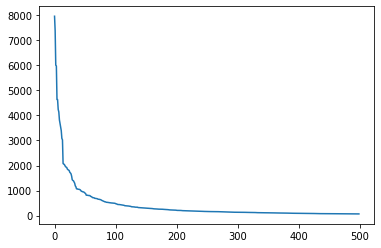

In [101]:
import matplotlib.pyplot as plt 
plt.plot(sorted(counts)[::-1][:500])

In [102]:
# Restricting to only the first 500 most frequent words
words_list_restr = [words_list[i] for i in np.argsort(counts)[::-1][:n_words_restr]]
print(words_list_restr)

['the', 'i', 'a', 'to', 'and', 'you', 'is', 'that', 'it', 'of', 'name', 'this', 'in', 'for', 'but', 'was', 'my', 'not', 'just', 'be', 'so', 'on', 'have', 'like', 'its', 'are', 'with', 'im', 'me', 'your', 'they', 'what', 'if', 'dont', 'he', 'at', 'thats', 'about', 'all', 'no', 'as', 'love', 'do', 'one', 'get', 'good', 'would', 'can', 'people', 'out', 'how', 'we', 'an', 'up', 'really', 'think', 'from', 'know', 'or', 'too', 'there', 'when', 'more', 'thanks', 'youre', 'now', 'them', 'she', 'lol', 'his', 'will', 'has', 'time', 'see', 'him', 'her', 'some', 'thank', 'who', 'well', 'because', 'still', 'why', 'much', 'even', 'had', 'go', 'their', 'were', 'only', 'right', 'oh', 'here', 'cant', 'got', 'didnt', 'than', 'been', 'did', 'then', 'by', 'being', 'want', 'way', 'never', 'hope', 'should', 'sorry', 'yeah', 'very', 'make', 'ive', 'man', 'great', 'back', 'better', 'hes', 'feel', 'bad', 'going', 'thing', 'could', 'actually', 'sure', 'also', 'same', 'need', 'doesnt', 'those', 'say', 'any', 'pr

In [103]:
# Set of all different possible words under consideration.
# We are updating the previously computed set, keeping only the 500 most frequent words
words = set(words_list_restr)

In [104]:
n_words= len(words)
n_words

500

In [105]:
# Each instance is a list of words
x_test_words = x_test_p.map(lambda s: [w for w in s.split(' ') if w!=''])
x_val_words = x_val_p.map(lambda s: [w for w in s.split(' ') if w!=''])

In [106]:
# Keeping only the 500 most frequent words.
# Each instance is a string.
x_train_p = x_train_words.map(lambda l: ' '.join([w for w in l if w in words]))
x_test_p = x_test_words.map(lambda l: ' '.join([w for w in l if w in words]))
x_val_p = x_val_words.map(lambda l: ' '.join([w for w in l if w in words]))

In [112]:
x_train_p.iloc[1]

'now if he does off everyone will think hes having a with people instead of actually'

In [111]:
x_train.iloc[1]

'Now if he does off himself, everyone will think hes having a laugh screwing with people instead of actually dead'

## Vectorization

In [113]:
from tensorflow.keras.layers import TextVectorization

In [114]:
vectorizer = TextVectorization(standardize='lower_and_strip_punctuation', split='whitespace')

In [115]:
vectorizer.adapt(x_train_p)

In [116]:
print(x_train_p.shape)
print(x_train_p[:5])

(24685,)
0           my food is anything i didnt have to myself
1    now if he does off everyone will think hes hav...
2                                      why the fuck is
3                                     to make her feel
4                                                     
Name: Text, dtype: object


In [117]:
print(vectorizer(x_train_p).shape)
print(vectorizer(x_train_p)[:5])

(24685, 27)
tf.Tensor(
[[ 17 447   8 205   3  98  25   4 355   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [ 71  35  34 174 149 192  72  58 117 277   5  28  46 485  12 123   0   0
    0   0   0   0   0   0   0   0   0]
 [ 84   2 191   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  4 112  67 119   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]], shape=(5, 27), dtype=int64)


$27$ is the maximum number of words in a train sentence

In [119]:
# New set of all possible words
words = vectorizer.get_vocabulary()
words[:5]

['', '[UNK]', 'the', 'i', 'to']

In [120]:
# This new set of all possible words is the same as before, wxcept for two additional fake words (one fake word is for the padding)
n_words = len(words)
n_words

502

In [121]:
# Dictionary, which maps words into the corresponding integers (i.e. indeces) 
word2index = dict((c, i) for i, c in enumerate(words))

# Dictionary, which maps integers/indeces into the corresponding words 
index2word = dict((i, c) for i, c in enumerate(words))

In [122]:
x_train_integers = vectorizer(x_train_p)

In [123]:
x_train_integers.shape

TensorShape([24685, 27])

In [124]:
# We transform also the test
x_test_integers = vectorizer(x_test_p)
x_test_integers.shape

TensorShape([5427, 25])

In [125]:
# We transform also the test
x_val_integers = vectorizer(x_val_p)
x_val_integers.shape

TensorShape([5426, 26])

### One-hot encoding

In [127]:
# One-hot encoding the train set

x_train_oneHot = np.zeros((x_train.shape[0], n_words))

for i,v in enumerate(x_train_integers):
  for w in v:
    #print(w)
    if w==0:
      break
    x_train_oneHot[i, w] = 1.0

x_train_oneHot.shape

(24685, 502)

In [128]:
# One-hot encoding the test set

x_test_oneHot = np.zeros((x_test.shape[0], n_words))

for i,v in enumerate(x_test_integers):
  for w in v:
    #print(w)
    if w==0:
      break
    x_test_oneHot[i, w] = 1.0

x_test_oneHot.shape

(5427, 502)

In [129]:
# One-hot encoding the val set

x_val_oneHot = np.zeros((x_val.shape[0], n_words))

for i,v in enumerate(x_val_integers):
  for w in v:
    #print(w)
    if w==0:
      break
    x_val_oneHot[i, w] = 1.0

x_val_oneHot.shape

(5426, 502)

## MODEL

In [130]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Model

In [131]:
xin = Input(shape=(n_words,))

x = Dense(units=256, activation='relu')(xin)

x = Dense(units=128, activation='relu')(x)

x = Dense(units=64, activation='relu')(x)

x = Dense(units=32, activation='relu')(x)

x = Dense(units=16, activation='relu')(x)

res = Dense(units=n_classes)(x)  # No activation

model = Model(xin, res)

In [132]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 502)]             0         
                                                                 
 dense (Dense)               (None, 256)               128768    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136   

## TRAINING

In [133]:
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [134]:
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [135]:
hist = model.fit(x_train_oneHot, y_train, batch_size=128, epochs=15, validation_data=[x_val_oneHot, y_val])

Epoch 1/15
193/193 [==============================] - 4s 4ms/step - loss: 1.4289 - accuracy: 0.4534 - val_loss: 1.2555 - val_accuracy: 0.5380
Epoch 2/15
193/193 [==============================] - 1s 4ms/step - loss: 1.1878 - accuracy: 0.5684 - val_loss: 1.1899 - val_accuracy: 0.5708
Epoch 3/15
193/193 [==============================] - 1s 4ms/step - loss: 1.0772 - accuracy: 0.6138 - val_loss: 1.1944 - val_accuracy: 0.5698
Epoch 4/15
193/193 [==============================] - 1s 4ms/step - loss: 0.9536 - accuracy: 0.6651 - val_loss: 1.2605 - val_accuracy: 0.5452
Epoch 5/15
193/193 [==============================] - 1s 4ms/step - loss: 0.8038 - accuracy: 0.7217 - val_loss: 1.3598 - val_accuracy: 0.5481
Epoch 6/15
193/193 [==============================] - 1s 4ms/step - loss: 0.6417 - accuracy: 0.7812 - val_loss: 1.5255 - val_accuracy: 0.5398
Epoch 7/15
193/193 [==============================] - 1s 4ms/step - loss: 0.4947 - accuracy: 0.8346 - val_loss: 1.7874 - val_accuracy: 0.5229
Epoch 

In [136]:
import matplotlib.pyplot as plt
def plot_history(training_history, n_epochs=None):
    if not n_epochs:
      n_epochs = len(training_history.history['loss'])

    epochs = range(1,n_epochs+1)

    plt.plot(epochs, training_history.history['loss'], label='train_loss')
    plt.plot(epochs, training_history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.title('Loss')

    plt.figure()
    plt.plot(epochs, training_history.history['accuracy'], label='train_accuracy')
    plt.plot(epochs, training_history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.title('Accuracy')

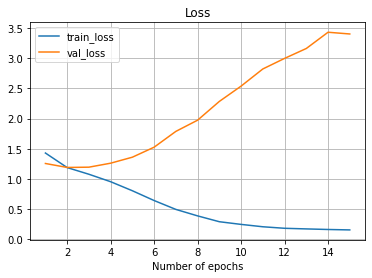

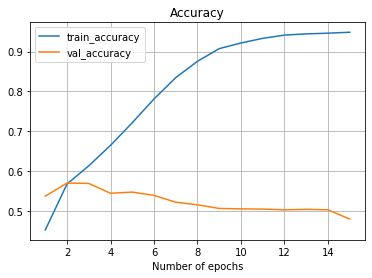

In [137]:
plot_history(hist)

Very high overfitting...

Final score: macro avg f1.

In [138]:
from sklearn.metrics import classification_report 

y_test_pred = model.predict(x_test_oneHot)
print(y_test_pred.shape)
y_test_pred = np.argmax(y_test_pred, axis=-1)
print(y_test_pred.shape)

print(classification_report(y_test, y_test_pred))

(5427, 8)
(5427,)
              precision    recall  f1-score   support

           0       0.49      0.48      0.49      1648
           1       0.28      0.23      0.25       572
           2       0.08      0.06      0.07        81
           3       0.32      0.33      0.33       677
           4       0.64      0.66      0.65      1978
           5       0.25      0.31      0.28       355
           6       0.19      0.10      0.13       116

    accuracy                           0.48      5427
   macro avg       0.32      0.31      0.31      5427
weighted avg       0.47      0.48      0.47      5427



## TRYING TO REDUCE OVERFITTING

In [139]:
from keras import regularizers  # Import the regularizers

In [140]:
xin = Input(shape=(n_words,))

x = Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(0.005))(xin)
x = Dropout(0.2)(x)

x = Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.005))(x)
x = Dropout(0.2)(x)

x = Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.005))(x)
x = Dropout(0.2)(x)

x = Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.005))(x)
x = Dropout(0.2)(x)

x = Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.005))(x)
x = Dropout(0.1)(x)

x = Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.005))(x)
x = Dropout(0.1)(x)

res = Dense(units=n_classes)(x)

model = Model(xin, res)

In [141]:
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [142]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 502)]             0         
                                                                 
 dense_6 (Dense)             (None, 256)               128768    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0   

In [143]:
from keras.callbacks import EarlyStopping  # Import the EarlyStopping class

early_stop_callback = EarlyStopping(monitor='val_accuracy', patience=7)  

Epoch 1/100
193/193 [==============================] - 2s 6ms/step - loss: 2.7318 - accuracy: 0.3993 - val_loss: 1.6094 - val_accuracy: 0.5028
Epoch 2/100
193/193 [==============================] - 1s 4ms/step - loss: 1.5417 - accuracy: 0.4987 - val_loss: 1.4619 - val_accuracy: 0.5153
Epoch 3/100
193/193 [==============================] - 1s 4ms/step - loss: 1.4658 - accuracy: 0.5062 - val_loss: 1.4398 - val_accuracy: 0.5066
Epoch 4/100
193/193 [==============================] - 1s 4ms/step - loss: 1.4426 - accuracy: 0.5103 - val_loss: 1.4226 - val_accuracy: 0.5164
Epoch 5/100
193/193 [==============================] - 1s 4ms/step - loss: 1.4274 - accuracy: 0.5137 - val_loss: 1.4036 - val_accuracy: 0.5232
Epoch 6/100
193/193 [==============================] - 1s 5ms/step - loss: 1.4219 - accuracy: 0.5122 - val_loss: 1.3998 - val_accuracy: 0.5249
Epoch 7/100
193/193 [==============================] - 1s 4ms/step - loss: 1.4126 - accuracy: 0.5174 - val_loss: 1.4017 - val_accuracy: 0.5151

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.39      0.79      0.52      1648
           1       0.00      0.00      0.00       572
           2       0.00      0.00      0.00        81
           3       0.00      0.00      0.00       677
           4       0.68      0.71      0.70      1978
           5       0.00      0.00      0.00       355
           6       0.00      0.00      0.00       116

    accuracy                           0.50      5427
   macro avg       0.15      0.21      0.17      5427
weighted avg       0.36      0.50      0.41      5427



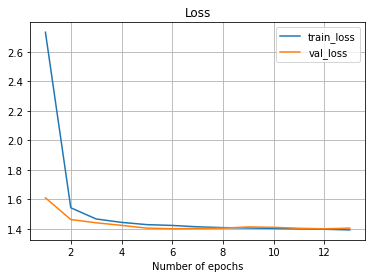

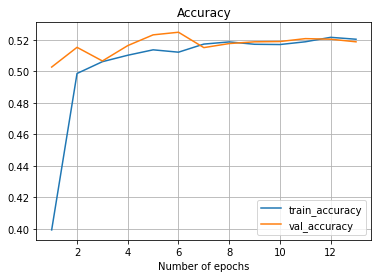

In [144]:
hist = model.fit(x_train_oneHot, y_train, batch_size=128, epochs=100, validation_data=[x_val_oneHot, y_val], callbacks=[early_stop_callback])
plot_history(hist)

y_test_pred = model.predict(x_test_oneHot)
y_test_pred = np.argmax(y_test_pred, axis=-1)
print(classification_report(y_test, y_test_pred))